In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("airbnb_listing_train.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,NaN,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,NaN,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,NaN,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,NaN,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,NaN,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90


In [4]:
df.shape

(12901, 16)

In [5]:
df.isna().sum()

id                                    0
name                                 22
host_id                               0
host_name                             8
neighbourhood_group               12901
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                        1596
reviews_per_month                  1596
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [6]:
df = df.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude','neighbourhood_group'], axis=1)

In [7]:
df.isna().sum()

neighbourhood                        0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       1596
reviews_per_month                 1596
calculated_host_listings_count       0
availability_365                     0
price                                0
dtype: int64

In [8]:
df = df.fillna('0')

In [10]:
df.isna().sum()

neighbourhood                     0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

In [12]:
df = df.drop('last_review',axis=1)

In [13]:
df.shape

(12901, 8)

In [14]:
df['neighbourhood'].value_counts()

De Baarsjes - Oud-West                    2209
De Pijp - Rivierenbuurt                   1600
Centrum-West                              1429
Centrum-Oost                              1097
Westerpark                                 958
Zuid                                       924
Oud-Oost                                   831
Bos en Lommer                              730
Oostelijk Havengebied - Indische Buurt     644
Watergraafsmeer                            381
Oud-Noord                                  376
IJburg - Zeeburgereiland                   321
Slotervaart                                269
Noord-West                                 257
Noord-Oost                                 171
Buitenveldert - Zuidas                     155
Geuzenveld - Slotermeer                    144
De Aker - Nieuw Sloten                      88
Osdorp                                      83
Gaasperdam - Driemond                       80
Bijlmer-Centrum                             78
Bijlmer-Oost 

In [16]:
df['room_type'].value_counts()

Entire home/apt    10064
Private room        2622
Hotel room           174
Shared room           41
Name: room_type, dtype: int64

In [17]:
df.describe()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price
count,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000
mean,3.542516,24.803194,2.136501,61.392295,166.959538
std,15.154077,53.406134,6.001838,107.988329,234.794630
min,1.000000,0.000000,1.000000,0.000000,6.000000
25%,2.000000,2.000000,1.000000,0.000000,99.000000
50%,2.000000,9.000000,1.000000,0.000000,135.000000
75%,3.000000,24.000000,1.000000,87.000000,190.000000
max,1001.000000,843.000000,78.000000,365.000000,9000.000000


In [25]:
p1 = df['price'].quantile(0.99)
p2 = df['price'].quantile(0.01)
print(p1, p2)

600.0 40.0


In [26]:
df.columns

Index(['neighbourhood', 'room_type', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price'],
      dtype='object')

In [27]:
nb = df['neighbourhood'].value_counts()

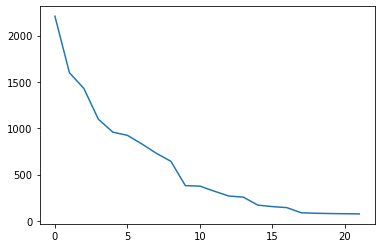

In [28]:
plt.plot(range(len(nb)), nb)

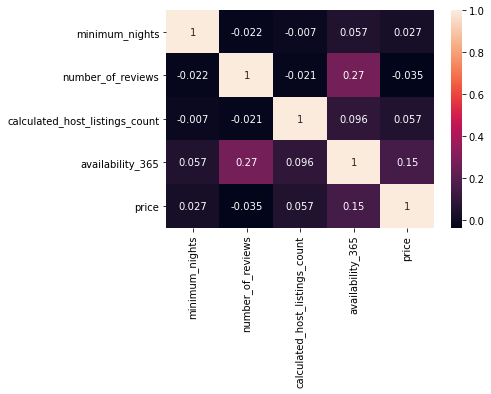

In [29]:
sns.heatmap(data=df.corr(), annot=True)

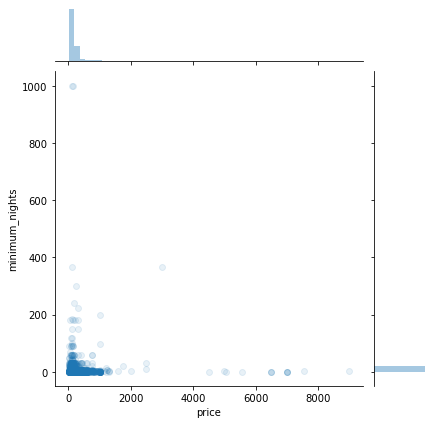

In [32]:
sns.jointplot(data=df,x='price', y='minimum_nights', alpha=0.1)

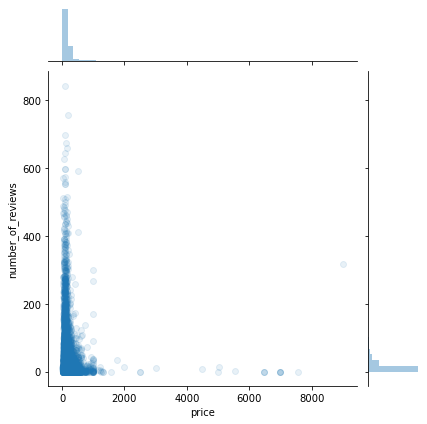

In [33]:
sns.jointplot(data=df,x='price', y='number_of_reviews', alpha=0.1)

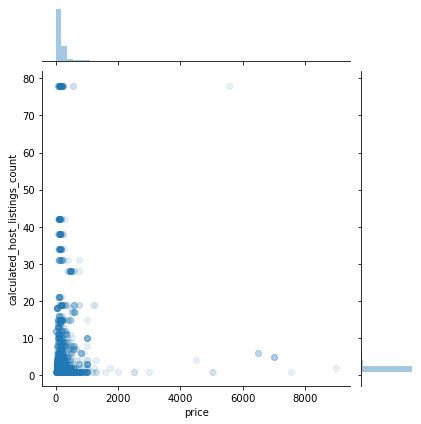

In [34]:
sns.jointplot(data=df,x='price', y='calculated_host_listings_count', alpha=0.1)

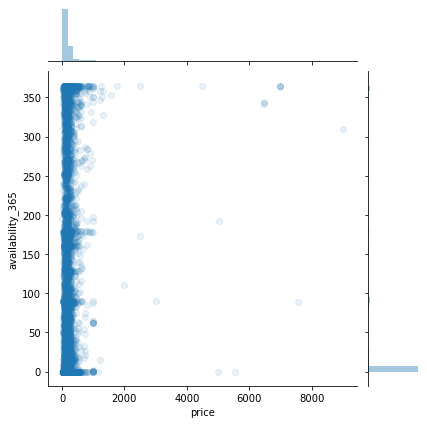

In [35]:
sns.jointplot(data=df,x='price', y='availability_365', alpha=0.1)

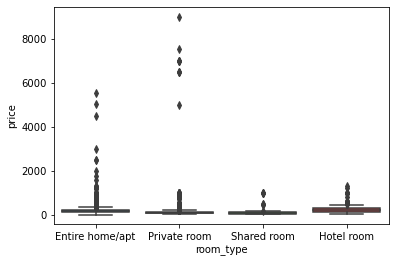

In [36]:
sns.boxplot(data=df, x='room_type', y='price')

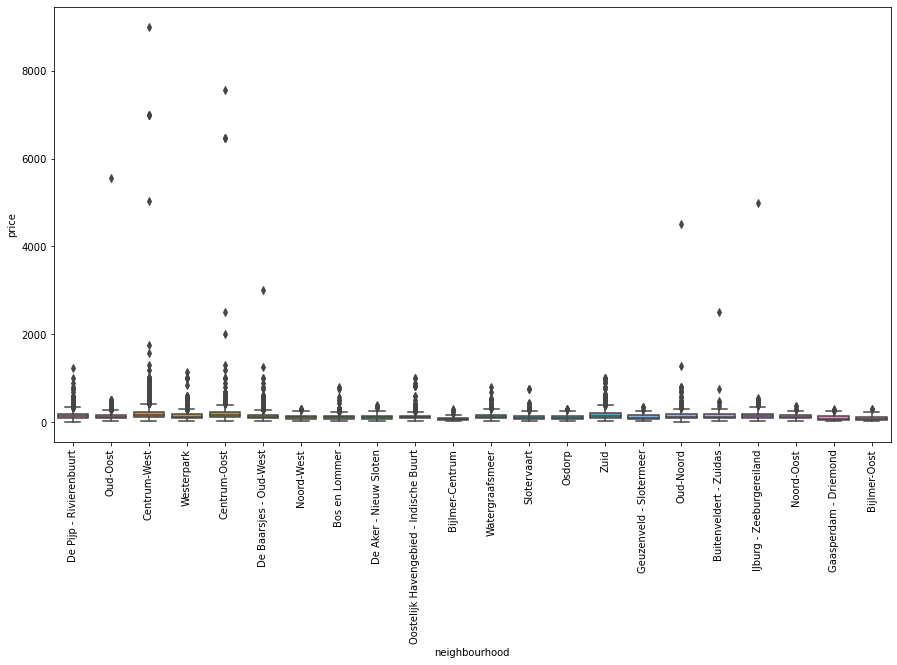

In [37]:
fig = plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='neighbourhood', y='price')
plt.xticks(rotation=90)
plt.show()

In [38]:
X_num = df[['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]
X_cat = df.drop(['minimum_nights', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'price'], axis=1)

In [42]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y=df['price']

In [43]:
X.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood,room_type,reviews_per_month
0,-0.035801,-0.221017,-0.189366,-0.568531,8,0,0.27
1,0.030190,-0.202292,-0.189366,-0.568531,17,0,0.29
2,-0.101793,-0.295917,-0.189366,-0.503706,5,0,1.65
3,-0.035801,0.322013,-0.189366,-0.568531,20,0,0.72
4,-0.101793,1.202096,-0.189366,-0.346276,20,2,4.02


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [48]:
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
pred_RF = model_RF.predict(X_test)
print(metrics.mean_absolute_error(y_test, pred_RF))
print(sqrt(metrics.mean_squared_error(y_test, pred_RF)))

71.99723772781644
213.08584348877588
